In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix

# Machine Learning Algorithms
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#decision tree
import sklearn.tree as sktree

# For Missing Values
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
import patsy


C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
import seaborn as sns #visualisation
import scipy
from scipy import stats
from scipy.stats.mstats import winsorize

# Get the data

In [18]:
players_22_norm = pd.read_csv('./FIFA/players_22_norm.csv', index_col='sofifa_id')

In [19]:
players_22_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19239 entries, 158023 to 264540
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   overall                      19239 non-null  int64  
 2   potential                    19239 non-null  int64  
 3   Log Market Value             19239 non-null  float64
 4   age                          19239 non-null  int64  
 5   skill_moves                  19239 non-null  float64
 6   international_reputation     19239 non-null  int64  
 7   attacking_crossing           19239 non-null  float64
 8   attacking_finishing          19239 non-null  float64
 9   attacking_heading_accuracy   19239 non-null  float64
 10  attacking_volleys            19239 non-null  float64
 11  skill_dribbling              19239 non-null  float64
 12  skill_fk_accuracy            19239 non-null  float64
 13  skill_long

# Structure of the file

In [20]:
players_22_norm.sort_values(by='Log Market Value', ascending=False).head(20)

,short_name,overall,potential,Log Market Value,age,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
sofifa_id,,,,,,,,,,,,,,,,,,,,,
231747,K. Mbappé,91,95,18.860225,22,5.0,4,78.0,93.0,72.0,...,82.0,79.0,88.0,26.0,32.0,13.0,5.0,7.0,11.0,1
239085,E. Haaland,88,93,18.515991,20,3.0,4,47.0,94.0,69.0,...,71.0,76.0,84.0,44.0,30.0,7.0,14.0,13.0,11.0,0
202126,H. Kane,90,90,18.456048,27,3.0,4,80.0,94.0,86.0,...,87.0,91.0,91.0,50.0,38.0,8.0,10.0,11.0,14.0,1
190871,Neymar Jr,91,91,18.452179,29,5.0,5,85.0,83.0,63.0,...,90.0,93.0,93.0,35.0,29.0,9.0,9.0,15.0,15.0,1
192985,K. De Bruyne,91,91,18.424673,30,4.0,4,94.0,82.0,55.0,...,94.0,83.0,89.0,68.0,53.0,15.0,13.0,5.0,10.0,1
188545,R. Lewandowski,92,92,18.375683,32,4.0,5,71.0,95.0,90.0,...,81.0,90.0,88.0,35.0,19.0,15.0,6.0,12.0,8.0,1
230621,G. Donnarumma,89,93,18.375683,22,1.0,3,12.0,12.0,12.0,...,60.0,24.0,68.0,20.0,16.0,91.0,83.0,79.0,85.0,1
228702,F. de Jong,87,92,18.375683,24,4.0,3,78.0,72.0,72.0,...,86.0,45.0,90.0,76.0,77.0,7.0,13.0,10.0,10.0,1
233049,J. Sancho,87,91,18.350258,21,5.0,3,82.0,83.0,38.0,...,87.0,62.0,86.0,32.0,32.0,7.0,11.0,10.0,11.0,1


In [13]:
players_22_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19239 entries, 158023 to 264540
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   overall                      19239 non-null  int64  
 2   potential                    19239 non-null  int64  
 3   Log Market Value             19239 non-null  float64
 4   age                          19239 non-null  int64  
 5   skill_moves                  19239 non-null  float64
 6   international_reputation     19239 non-null  int64  
 7   attacking_crossing           19239 non-null  float64
 8   attacking_finishing          19239 non-null  float64
 9   attacking_heading_accuracy   19239 non-null  float64
 10  attacking_volleys            19239 non-null  float64
 11  skill_dribbling              19239 non-null  float64
 12  skill_fk_accuracy            19239 non-null  float64
 13  skill_long

In [21]:
players_22_norm.shape

(19239, 37)

# Data Cleaning

In [22]:
y, X = patsy.dmatrices("Q('Log Market Value') ~ age + international_reputation + Q('skill_moves') + attacking_crossing + attacking_finishing + attacking_heading_accuracy + attacking_volleys + skill_dribbling + skill_fk_accuracy + skill_long_passing + skill_ball_control + movement_acceleration + movement_sprint_speed + movement_agility + movement_reactions + movement_balance + power_shot_power + power_jumping + power_stamina + power_strength + power_long_shots + mentality_aggression + mentality_positioning + mentality_vision + mentality_penalties + mentality_composure + defending_marking_awareness + defending_sliding_tackle + goalkeeping_diving + goalkeeping_handling + goalkeeping_kicking + goalkeeping_positioning + preferred_foot_Right", 
                       data=players_22_norm, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Log Market Value')   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     2947.
Date:                   Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                           00:53:19   Log-Likelihood:                -13934.
No. Observations:                  19239   AIC:                         2.794e+04
Df Residuals:                      19205   BIC:                         2.820e+04
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       5.9972      0.049    122.587      0.000       5.901       6.093
age                            -0.1130      0.001   -113.624      0.000      -0.115      -0.111
international_reputation        0.4457      0.011     40.231      0.000       0.424       0.467
Q('skill_moves')                0.2018      0.009     23.683      0.000       0.185       0.219
attacking_crossing              0.0076      0.000     15.420      0.000       0.007       0.009
attacking_finishing             0.0058      0.001      8.802      0.000       0.005       0.007
attacking_heading_accuracy      0.0153      0.001     28.278      0.000       0.014       0.016
attacking_volleys              -0.0015      0.001     -2.632      0.008      -0.003      -0.000
skill_dribbling                 0.0053      0.001      6.481      0.000       0.004       0.007
skill_fk_accuracy              -0.0005      0.000     -1.074      0.283      -0.001       0.000
skill_long_passing              0.0020      0.001      3.672      0.000       0.001       0.003
skill_ball_control              0.0331      0.001     36.141      0.000       0.031       0.035
movement_acceleration           0.0043      0.001      5.794      0.000       0.003       0.006
movement_sprint_speed           0.0051      0.001      7.728      0.000       0.004       0.006
movement_agility               -0.0027      0.001     -4.709      0.000      -0.004      -0.002
movement_reactions              0.0565      0.001     75.939      0.000       0.055       0.058
movement_balance               -0.0030      0.000     -6.298      0.000      -0.004      -0.002
power_shot_power                0.0081      0.001     13.800      0.000       0.007       0.009
power_jumping                  -0.0004      0.000     -0.968      0.333      -0.001       0.000
power_stamina                   0.0067      0.000     15.030      0.000       0.006       0.008
power_strength                  0.0052      0.000     11.107      0.000       0.004       0.006
power_long_shots               -0.0067      0.001    -10.758      0.000      -0.008      -0.005
mentality_aggression        -7.063e-05      0.000     -0.166      0.868      -0.001       0.001
mentality_positioning          -0.0083      0.001    -13.048      0.000      -0.009      -0.007
mentality_vision               -0.0046      0.001     -8.034      0.000      -0.006      -0.003
mentality_penalties            -0.0015      0.001     -2.798      0.005      -0.003      -0.000
mentality_composure             0.0136      0.001     22.373      0.000       0.012       0.015
defending_marking_awareness     0.0051      0.001      9.072      0.000       0.004       0.006
defending_sliding_tackle        0.0008      0.001      1.393      0.164   

In [23]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")
    
    lin_mse = mean_squared_error(y, pred)
    lin_rmse = np.sqrt(lin_mse)
    lin_rmse
    
    score = r2_score(y, pred)  
    print('Accuracy:',format(score*100,'.2f'),'%')

In [24]:
y = players_22_norm['Log Market Value']
X = players_22_norm.drop(['short_name','Log Market Value'],axis=1)

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log Market Value'>

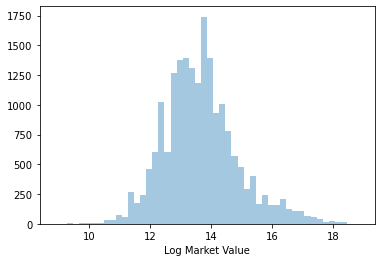

In [25]:
sns.distplot(y,kde=False)

Accuracy: 95.96 %


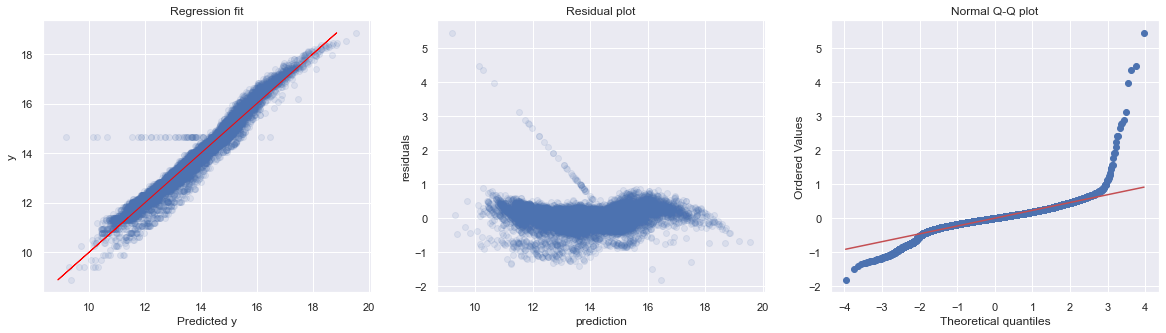

In [26]:
sns.set(style='darkgrid')
diagnostic_plot(X, y)

# Feature Selection

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

sel_ = SelectFromModel(DecisionTreeRegressor(random_state=42)) 
sel_.fit(X_norm, y)

SelectFromModel(estimator=DecisionTreeRegressor(random_state=42))

In [28]:
sel_.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [30]:
selected_feat = X.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_ == 0)))

total features: 35
selected features: 3
features with coefficients shrank to zero: 0


In [31]:
selected_feat

Index(['overall', 'potential', 'age'], dtype='object')

# Modeling

In [32]:
X_model = X[selected_feat]
X_model.shape

(19239, 3)

In [33]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_model, y, test_size=0.25,random_state=42)
#X_train_val = X[3848:]
#X_test = X[:3848]
#y_train_val = y[3848:]
#y_test = y[:3848]

In [34]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_val, y_train_val)# Decision Tree

DecisionTreeRegressor(random_state=42)

In [36]:
pred = tree_reg.predict(X_test)


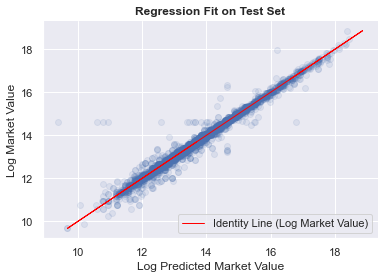

In [37]:
plt.scatter(pred,y_test,alpha=0.1)
plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
plt.title("Regression Fit on Test Set",weight='bold')
plt.xlabel("Log Predicted Market Value")
plt.ylabel("Log Market Value")
plt.legend(loc='lower right')
sns.despine()

In [38]:
lin_mse = mean_squared_error(pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.20481949190699628

In [39]:
score = r2_score(y_test, pred)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 97.15 %


In [41]:
print('Precisión del modelo:')
print(tree_reg.score(X_test, y_test))

Precisión del modelo:
0.9714923740087325


In [42]:
def get_mae(max_leaf_nodes, X_train_val, X_test, y_train_val, y_test):
    """Return the mae of the random forest."""
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(X_train_val, y_train_val)
    preds_test = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_test)
    return(mae)

candidate_max_leaf_nodes = range(20, 30)

best_mae =  get_mae(5, X_train_val, X_test, y_train_val, y_test)
for max_leaf_nodes in candidate_max_leaf_nodes[1:]:
    candidate_mae = get_mae(max_leaf_nodes, X_train_val, X_test, y_train_val, y_test)
    if candidate_mae < best_mae:
        best_mae, best_candidate = candidate_mae, max_leaf_nodes

best_tree_size = best_candidate
print(f"Best tree size is {best_tree_size} nodes.")

Best tree size is 29 nodes.


In [43]:
price_model_tree_max = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=42)
price_model_tree_max.fit(X_train_val, y_train_val)

test_predictions = price_model_tree_max.predict(X_test)
test_mae = mean_absolute_error(test_predictions, y_test)
test_mae
print("Validation MAE when max_leaf_nodes={}: {:,.0f}".format(best_tree_size, test_mae))

Validation MAE when max_leaf_nodes=29: 0


In [44]:
score = r2_score(y_test, test_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 94.19 %


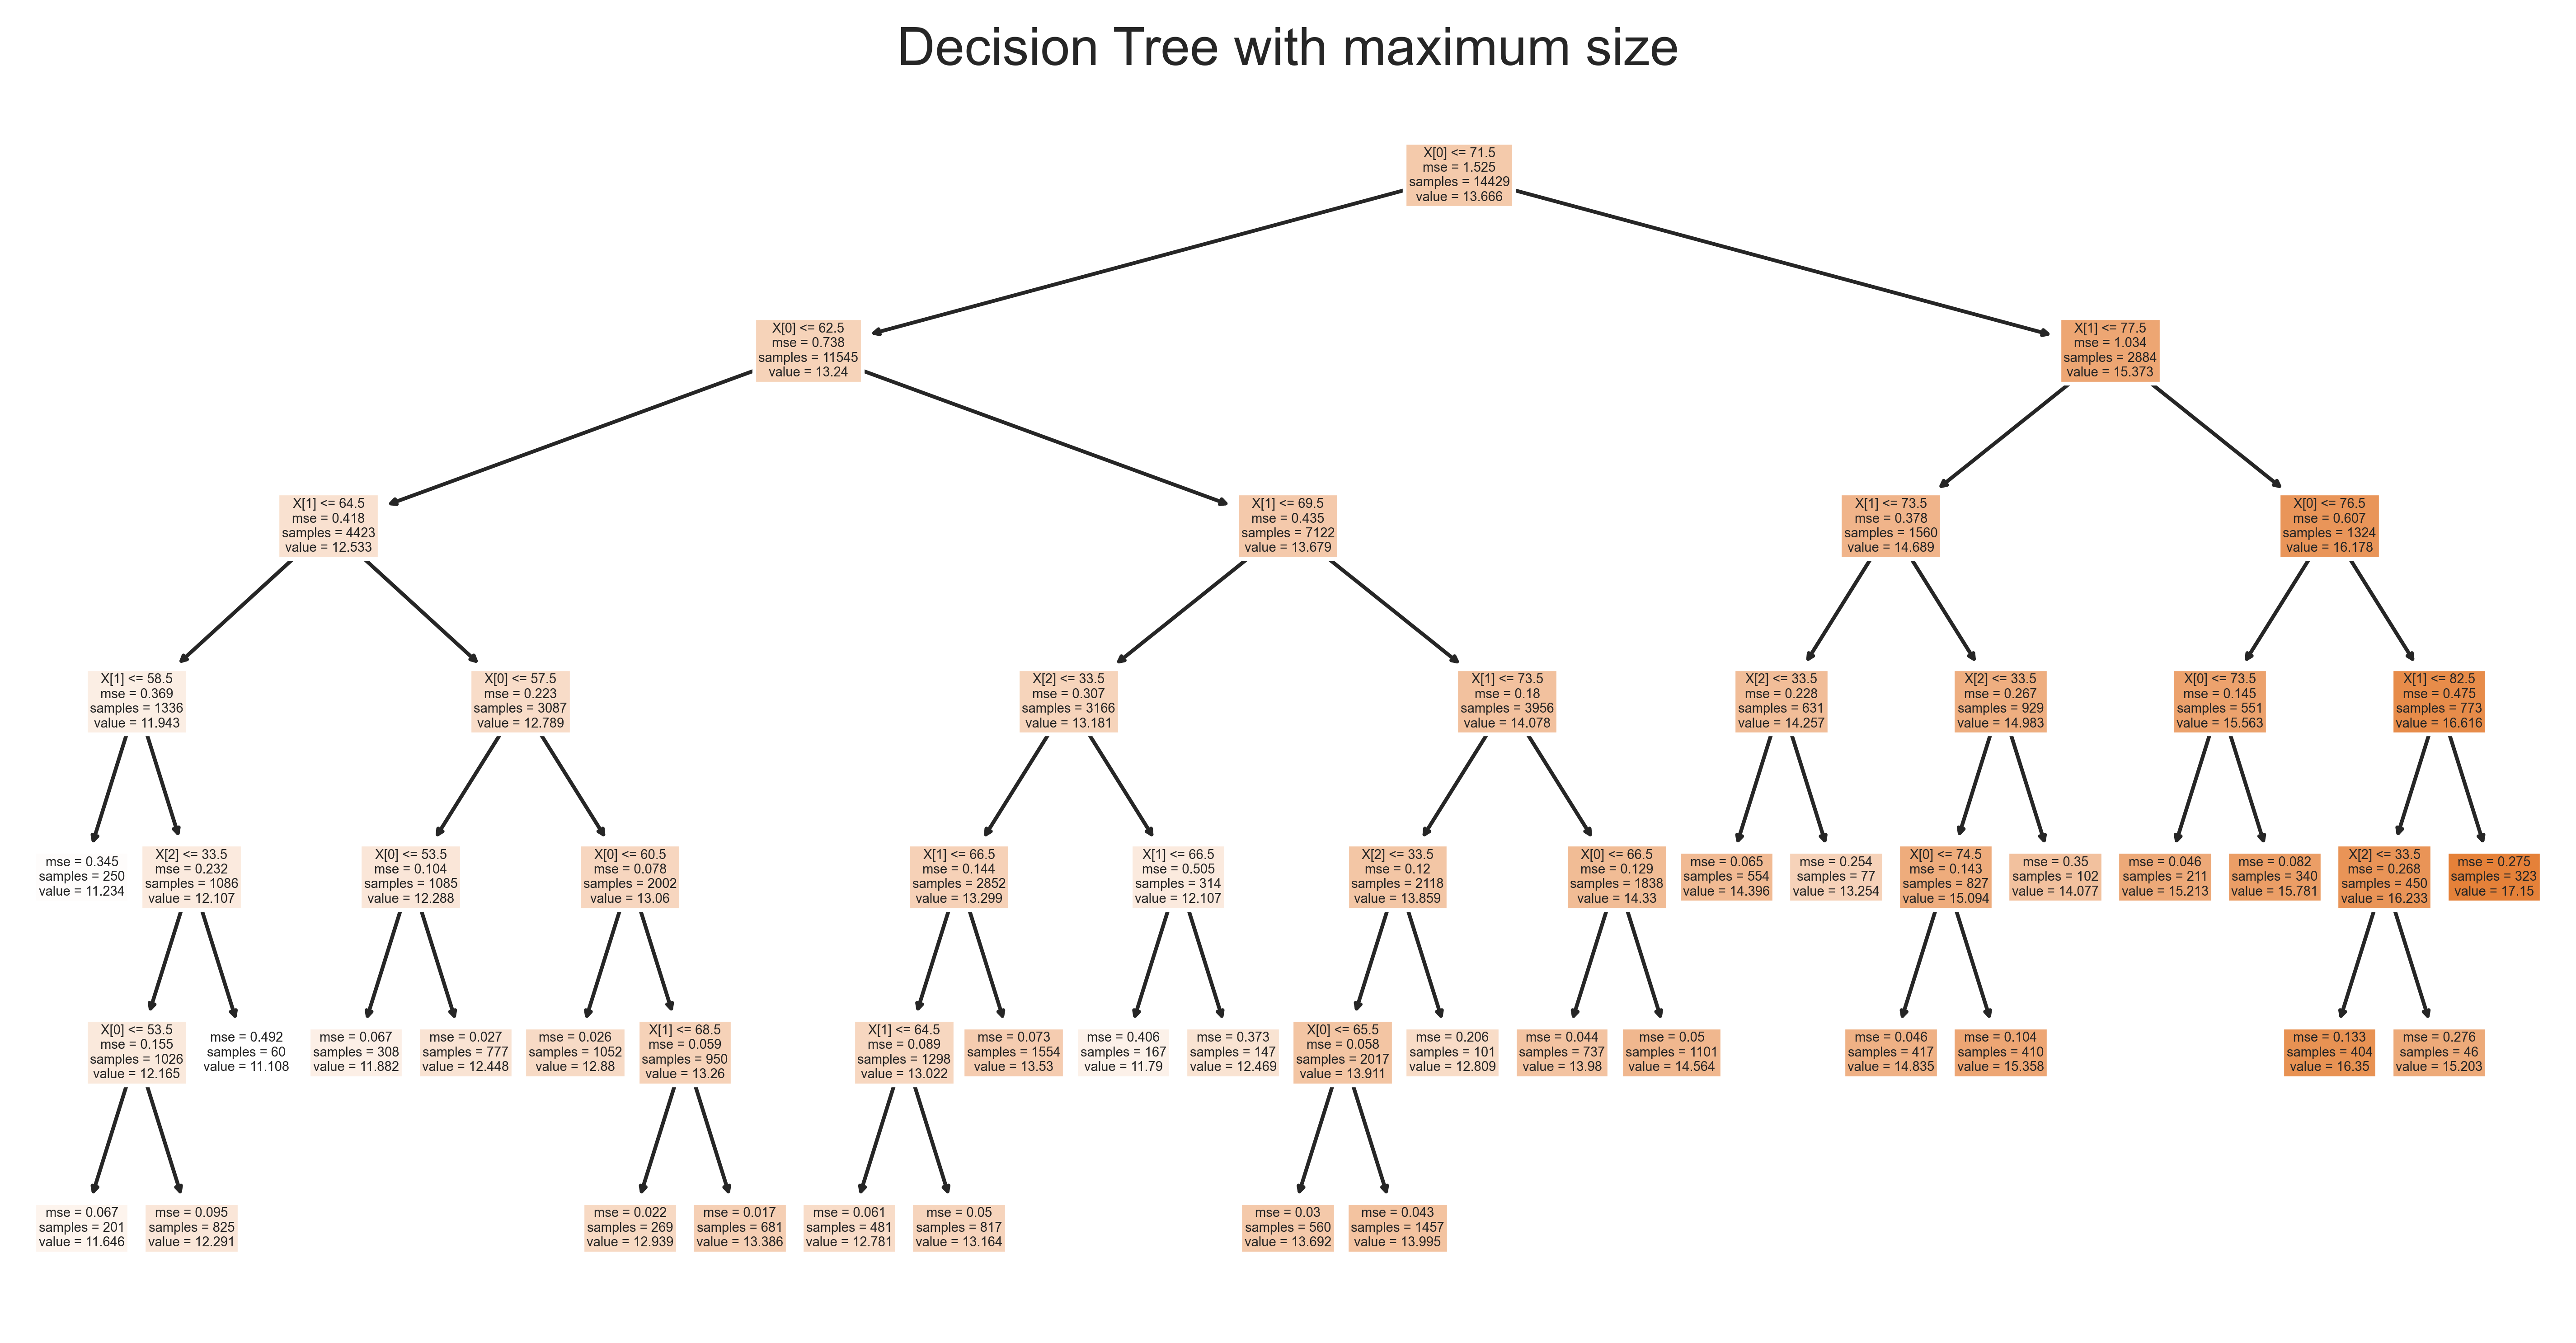

In [45]:
fn=X_train_val.columns
cn=y_test.name
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6), dpi=600)
sktree.plot_tree(price_model_tree_max,
                 filled = True)
axes.set_title('Decision Tree with maximum size', fontsize = 14)
fig.savefig('tree_nomax.png')

# RANDOM FOREST

In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
X_norm_rf = MinMaxScaler().fit_transform(X)

sel_ = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
sel_.fit(X_norm_rf, y)

SelectFromModel(estimator=RandomForestRegressor(random_state=42))

In [48]:
sel_.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [49]:
selected_feat = X.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_ == 0)))

total features: 35
selected features: 3
features with coefficients shrank to zero: 0


In [50]:
selected_feat

Index(['overall', 'potential', 'age'], dtype='object')

In [51]:
X_model_rf = X[selected_feat]
X_model_rf.shape

(19239, 3)

In [52]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_model_rf, y, test_size=0.25,random_state=42)
#X_train_val = X[3848:]
#X_test = X[:3848]
#y_train_val = y[3848:]
#y_test = y[:3848]

In [53]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_val, y_train_val)

RandomForestRegressor(random_state=42)

In [54]:
pred = forest_reg.predict(X_test)

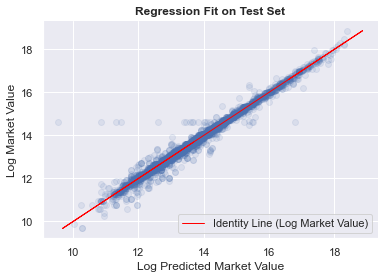

In [55]:
plt.scatter(pred,y_test,alpha=0.1)
plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
plt.title("Regression Fit on Test Set",weight='bold')
plt.xlabel("Log Predicted Market Value")
plt.ylabel("Log Market Value")
plt.legend(loc='lower right')
sns.despine()

In [56]:
lin_mse = mean_squared_error(pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.1915708580547525

In [57]:
score = r2_score(y_test, pred)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 97.51 %


In [58]:
print('Precisión del modelo:')
print(forest_reg.score(X_test, y_test))

Precisión del modelo:
0.9750610954851303


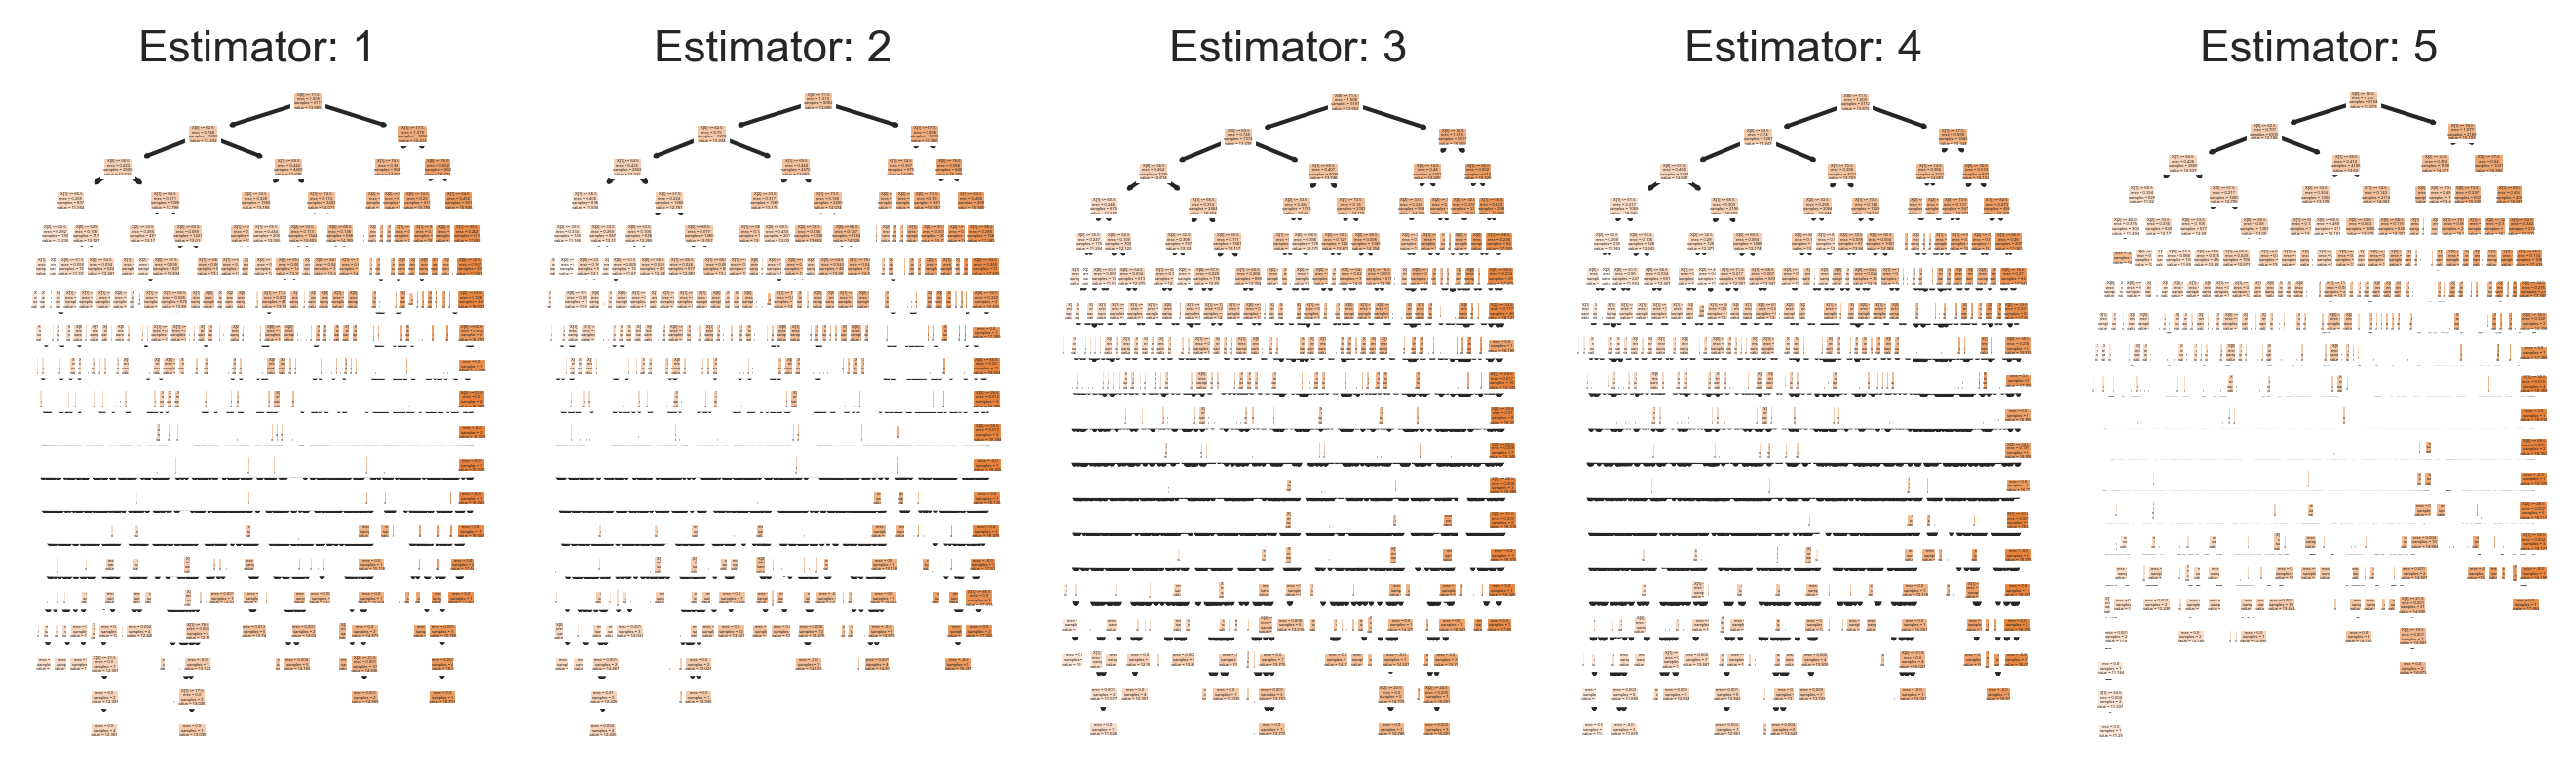

In [59]:
fn=X_train_val.columns
cn=y_test.name
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(11,3), dpi=300)
for index in range(0, 5):
    sktree.plot_tree(forest_reg.estimators_[index],
                     #feature_names = fn,
                     filled = True,
                     ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index+1), fontsize = 11)
fig.savefig('forest_5trees.png')